<div align="right">
Massimo Nocentini
<br>May 25, 2016: Polyominoes
<br>May 23, 2016: n-Queens
<br>May 22, 2016: subsets sums with Gray codes
<br>May 21, 2016: basics, subsets sums
</div>

<div align="center">
<b>Abstract</b><br>
This document collect some examples about *bit manipulation techniques* and some application of them to contest problems
</div>

# Intro

The current notebook born with the aim to collect introductory material, references, tutorial, code snippet and challenging problems around the topic of *bit manipulation techniques*. It follows to fullfil our need to get a deep understanding of this topic to be competitive in programming (contests).

First of all a collection of general references follows:

   - [__The Aggregate Magic Algorithms__][aggregate], by _Department of Electrical and Computer Engineering at the University of Kentucky_
   - [__Bit Twiddling Hacks__][seander], by _Sean Eron Anderson_
   
On the other hand, the following pages have a spirit toward programming contests:

   - [__CPSC 490 202 - Problem Solving in Computer Science__][CPSC 490 202 current] ([old][CPSC 490 202 old] version)
   
[aggregate]:http://aggregate.org/MAGIC/
[seander]:http://graphics.stanford.edu/~seander/bithacks.html

[CPSC 490 202 old]:http://www.ugrad.cs.ubc.ca/~cs490/sec202/
[CPSC 490 202 current]:http://www.ugrad.cs.ubc.ca/~cs490/2015W2/

# *bit masking* core idea

In this section we study [this][basic] introductory document, where the first paragraph reads:

>Suppose you have a set of objects and you want some way to represent which objects to pick and
which ones not to pick. How do you represent that in in a program? More generally, *how do you
represent a subest of a set*? We can represent whether an object *is picked or not by a single bit*! Using a boolean to represent this is an overkill in terms of memory usage. However, neither C++ nor Java has any data type representing a single bit, so how can we cut down the memory usage?
**The answer is to use an integer!** We know an integer is just a bunch of bits stringed together, so
why don’t we use the integer to represent the entire set?

> For example, suppose in a set of 5 objects, we have picked the 1st, 3rd, and 4th object. The bitmask to represent this in binary is 01101 or 13 in decimal (in the notes, the 1st bit will always be the least significant bit and
will always appear at the very right). *We have just cut down the memory usage from five booleans to
a single integer*!

Then follows a list of basic manipulations, which we coded in [this][our:bits] Python module, loaded in the next cell; two functions deserve attention, namely `subsets` and `subsets_of`, read the docstring for info.

[basic]:http://www.ugrad.cs.ubc.ca/~cs490/sec202/notes/intro/bitmask.pdf
[our:bits]:https://github.com/massimo-nocentini/competitive-programming/blob/master/python-libs/bits.py

In [6]:
%matplotlib inline
%run ../python-libs/bits.py
%run ../python-libs/timing.py
%run ../python-libs/graycodes.py
%run ../python-libs/symbols.py

# Sum of subsets: a first example

## With "usual" subsets generation

Previous doc finishes with an first application of bitmasking, here the request:

>Bitmask is an efficient and convenient way to represent subsets. For example, **given a set of numbers,
we want to find the sum of all subsets**. This is easy to code using bitmasks. Furthermore, we can use
an array to store all the results (imagine storing the results when you are using an array to represent
the subset)!

The following cell contains a pythonic implementation of their code, which is given in `C`: generator `subsets` yields subsets one by one, such that a successor subset `s` is computed by a previous subset `p` by *increment*, namely `s = p + 1`.

In [2]:
def subsets_sums(S):
    """
    Returns a map of `(s, v)`, where `s` is a subset of `S`, and `v` is `sum(i in S & s)`.
    """
    n = len(S)
    sums = [0 for _ in range(1 << n)]
    for s in subsets(n):
        for j, v in enumerate(S):
            sums[s] += is_on(s, j, return_int=True) * v
    
    return sums

As a first experiment, let `S` be a list of 4 random integers, each one less than $2^{8}$.

In [3]:
from random import randrange
S = [randrange(1 << 8) for _ in range(1 << 2)]
S

[184, 150, 30, 153]

We time the execution of the function `subsets_sums` applied to `S` and bind `sums` to the resulting mapping:

In [4]:
with timing(lambda: subsets_sums(S)) as (sums, start, end):
    print("Elapsed time: {:.5} secs".format(end-start))

Elapsed time: 0.00037456 secs


Have a look at results, after the definition of the pretty printing utility `pretty_dict`:

In [5]:
def pretty(sums):
    """
    Utility pretty printer.
    """
    return {pretty_mask(j, coding='little', width=len(S)): v for j, v in enumerate(sums)}

In [6]:
pretty(sums)

{'0000': 0,
 '0001': 153,
 '0010': 30,
 '0011': 183,
 '0100': 150,
 '0101': 303,
 '0110': 180,
 '0111': 333,
 '1000': 184,
 '1001': 337,
 '1010': 214,
 '1011': 367,
 '1100': 334,
 '1101': 487,
 '1110': 364,
 '1111': 517}

### Repeating experiments

In [7]:
def plotter(do, n):
    
    import matplotlib.pyplot as plt

    def doer(i):
        """
        Repeat the previous experiment with lists of integers lengths `i`.
        """
        S = [randrange(1 << 8) for _ in range(i)]
        with timing(lambda: do(S)) as (sums, start, end):
            return end - start

    l = range(n)
    line, = plt.plot(l, list(map(doer, l)), '--', linewidth=2)

    plt.xlabel("lengths")
    plt.ylabel("secs")
    plt.show()

Moreover, we repeat the above experiment for lists of integers with different lengths to understand the *exponential* complexity of *subsets* enumeration: the longer list will have **24 integers** and it took aproximately **5 minutes** to return an answer.

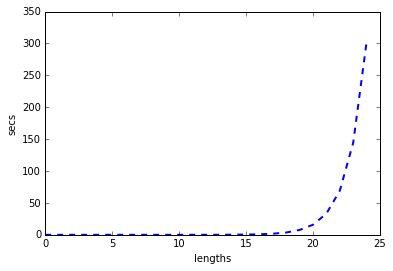

In [13]:
plotter(subsets_sums, n=25)

## Subsets enumeration as Gray codes

Another order of generation can be used for subsets, namely we see each subset as a [Gray code][gray]. In this way we know that consecutive subsets differs *exactly* by one bit, which is the same to say that they have the same objects but one, so *one* object goes away or comes in. 

Here is the a new function `subsets_sums_gray` that uses two hooks; given two consecutive subsets and `p` is the position of the bit `b` that toggles, if `b` switches *off* then `off` hook removes the corresponding value `S[p]` from the sum cumulated up to now, otherwise `add` hook adds `S[p]` to the sum.

[gray]:http://nbviewer.jupyter.org/github/massimo-nocentini/competitive-programming/blob/master/tutorials/graycodes.ipynb?flush_cache=true

In [8]:
def subsets_sums_gray(S):
    """
    Returns a map of `(s, v)`, where `s` is a subset of `S`, and `v` is `sum(i in S & s)`.
    """
    return list(high(gray_codes(length=len(S)),                
                on= lambda p, r: r + S[p],                      
                off=lambda p, r: r - S[p], 
                redux=0))

We time the new experiment applying it to the same list of integers `S`:

In [9]:
with timing(lambda: subsets_sums_gray(S)) as (res, start, end):
    
    print("Elapsed time: {:.5} secs".format(end-start))
    
    sums_gray = [0 for _ in range(1 << len(S))]
    for o, s, p, r in res:
        sums_gray[s] = r

Elapsed time: 0.00019288 secs


and we pretty print the subsets sums

In [10]:
pretty(sums_gray)

{'0000': 0,
 '0001': 153,
 '0010': 30,
 '0011': 183,
 '0100': 150,
 '0101': 303,
 '0110': 180,
 '0111': 333,
 '1000': 184,
 '1001': 337,
 '1010': 214,
 '1011': 367,
 '1100': 334,
 '1101': 487,
 '1110': 364,
 '1111': 517}

checking that the answers are the same

In [11]:
assert sums == sums_gray

We repeat the experiment for lists of integers of different lengths as done before:

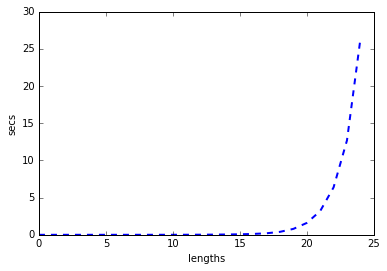

In [12]:
plotter(subsets_sums_gray, n=25)

using this order of subsets generations we gain approximately a **10-factor** respect the "usual" generation order.

# $n$-Queens problem

In this section we provide a pythonic implementation of the $n$-Queens problem, using the approach described by [Ruskey][ruskey] in Chapter 3 of his book [Combinatorial Generation][cg]. We use three *bit masks*, namely integers, to represent whether a row, a raising $\nearrow$ and a falling $\searrow$ diagonal are "under attack" by an already placed queen, instead of three boolean arrays. It is sufficient to use *one* bit only to represent that a cell on a diagonal is under attack because:

   - if the diagonal is raising, call it $d_\nearrow$, then $a_{r_{1}, c_{1}}\in d_\nearrow \wedge a_{r_{2}, c_{2}} \in d_\nearrow$ if and only if $r_{1}+c_{1}=r_{2}+c_{2}$; in words, the sum of the row and column indices is constant along raising diagonals.
   - if the diagonal is falling, call it $d_\searrow$, then $a_{r_{1}, c_{1}}\in d_\searrow \wedge a_{r_{2}, c_{2}} \in d_\searrow$ if and only if $c_{1}-r_{1}=c_{2}-r_{2}$; in words, the difference of the column and row indices is constant along falling diagonals.
   
Here's the code:

[ruskey]:http://webhome.cs.uvic.ca/~ruskey/
[cg]:http://www.1stworks.com/ref/RuskeyCombGen.pdf

In [15]:
def queens(n):
    """
    Return an iterable of solutions to the `n`-Queens problem.
    """
    sol = [0] * n
    
    def gen(c, rows, raises, falls):
        
        for r in range(n):
            
            raising = c + r
            falling = (c - r) % (2*n-1) # we use a modular ring in order to handle the case r > c, in this way
                                        # negative positions appear in the most significant part of `falls`
            
            if is_on(rows, r) and is_on(raises, raising) and is_on(falls, falling):
                
                sol[c] = r
                
                yield from [sol] if c == n-1 else gen(c+1, 
                                                      clear_bit(rows, r), 
                                                      clear_bit(raises, raising), 
                                                      clear_bit(falls, falling))
                
    return gen(0, set_all(n), set_all(2*n-1), set_all(2*n-1))

def pretty(sol):
    n = len(sol)
    s = ""
    for r in range(n):
        pos = sol.index(r)
        s += "|{}|\n".format("|".join('Q' if c == pos else ' ' for c in range(n)))
    return s

Simple case with a $5\times 5$ board, so an instance of $5$-Queens problem:

In [16]:
for i, s in enumerate(queens(5)):
    print("sol {}:\n{}".format(i, pretty(s)))

sol 0:
|Q| | | | |
| | | |Q| |
| |Q| | | |
| | | | |Q|
| | |Q| | |

sol 1:
|Q| | | | |
| | |Q| | |
| | | | |Q|
| |Q| | | |
| | | |Q| |

sol 2:
| | |Q| | |
|Q| | | | |
| | | |Q| |
| |Q| | | |
| | | | |Q|

sol 3:
| | | |Q| |
|Q| | | | |
| | |Q| | |
| | | | |Q|
| |Q| | | |

sol 4:
| |Q| | | |
| | | |Q| |
|Q| | | | |
| | |Q| | |
| | | | |Q|

sol 5:
| | | | |Q|
| | |Q| | |
|Q| | | | |
| | | |Q| |
| |Q| | | |

sol 6:
| |Q| | | |
| | | | |Q|
| | |Q| | |
|Q| | | | |
| | | |Q| |

sol 7:
| | | | |Q|
| |Q| | | |
| | | |Q| |
|Q| | | | |
| | |Q| | |

sol 8:
| | | |Q| |
| |Q| | | |
| | | | |Q|
| | |Q| | |
|Q| | | | |

sol 9:
| | |Q| | |
| | | | |Q|
| |Q| | | |
| | | |Q| |
|Q| | | | |



A more demanding case $20$-Queens, build the generator for solutions:

In [13]:
more_queens = queens(20)

and ask for the first 5 of them; in this case we see that some time is required to reach the first leaf in the *backtracking tree* which is also a valid solution.

In [14]:
for i in range(5):
    with timing(lambda: next(more_queens)) as (s, start, end):
        print("Solution computed in {:.5} secs:\n{}".format(end-start, pretty(s)))

Solution computed in 3.1767 secs:
|Q| | | | | | | | | | | | | | | | | | | |
| | | |Q| | | | | | | | | | | | | | | | |
| |Q| | | | | | | | | | | | | | | | | | |
| | | | |Q| | | | | | | | | | | | | | | |
| | |Q| | | | | | | | | | | | | | | | | |
| | | | | | | | | | | | | | | | | | |Q| |
| | | | | | | | | | | | | | | | |Q| | | |
| | | | | | | | | | | | | | |Q| | | | | |
| | | | | | | | | | | |Q| | | | | | | | |
| | | | | | | | | | | | | | | |Q| | | | |
| | | | | | | | | | | | | | | | | | | |Q|
| | | | | | | |Q| | | | | | | | | | | | |
| | | | | |Q| | | | | | | | | | | | | | |
| | | | | | | | | | | | | | | | | |Q| | |
| | | | | | |Q| | | | | | | | | | | | | |
| | | | | | | | | | | | |Q| | | | | | | |
| | | | | | | | | | |Q| | | | | | | | | |
| | | | | | | | |Q| | | | | | | | | | | |
| | | | | | | | | | | | | |Q| | | | | | |
| | | | | | | | | |Q| | | | | | | | | | |

Solution computed in 8.9407e-05 secs:
|Q| | | | | | | | | | | | | | | | | | | |
| | | |Q| | | | | | | | | | | | | | | | |
| |

# Polyominoes problem

In this section we play with [polyominoes][poly], formalized by prof. [Golomb][golomb]; we arrived here by reading the chapter about backtracking in the volume of Ruskey.

Maybe the hardest part is understand how to represent the board and the state (free/occupied) of each cell; moreover, the question about how a shape, and its orientation, is interesting too. We answer to each one:

   - a board with $r$ rows and $c$ columns
     $$
     \begin{array}{c|c|c|c|c}
     0 & r & 2r & \ldots & (c-1)r \\
     \hline
     1 & r+1 & 2r+1 & \ldots & (c-1)r+1 \\
     \hline
     \vdots & \vdots & \vdots & \ddots & \vdots \\
     \hline
     r-1 & 2r-1 & \ldots & \ldots & rc-1\\
     \end{array}
     $$
     is represented by an *integer* with $rc$ bits; this is because we want to use *bit masking* techniques and
     it is efficient to find the next *free* cell (using the utility function `low_bit`), which correspond to
     the position of the first bit 1 from the right, namely the least significant part.
   - a *shape* is a collection of cells, usually sharing an edge pairwise. We choose to represent a shape as a
     `lambda` expression, that consumes the *anchor* position as a pair of row and column indices, 
     and returns a list of
     orientations, namely positions coding a possible symmetry, reflection or rotation of the shape; therefore, 
     each orientation is a sequence of positions too. 
     
     By *anchor* we mean the position in which the top-left cell
     of a shape orientation will be placed in the next *free* cell in the board; every orientation should be
     relative to the *anchor* provided, here an example, where the *anchor* is _always_ given at position `(r,c)`
     
                *                     (r-2,c+2)
                *   ->                (r-1,c+2)
            * * *       (r,c) (r,c+1) (r, c+2)
     so the orientation is coded as the iterable `((r,c), (r,c+1), (r-2,c+2), (r-1,c+2), (r, c+2))`.
     The section about *pentominoes* contains many examples of shapes coding.

The following code implements a *backtracking* function that yields a sequence of tiling of a given board, possibly containing some forbidden cells, according to a set of available shapes.

[poly]:https://en.wikipedia.org/wiki/Polyomino
[golomb]:https://en.wikipedia.org/wiki/Solomon_W._Golomb

In [172]:
def polyominoes(dim, shapes, availables='ones', max_depth_reached=None, forbidden=[]):
    """
    Returns an iterable of arrangements for the Polyominos problem.
    """
    rows, cols = dim
    sol = []
    if not availables or availables == 'ones':
        availables = [1]*len(shapes) 
    elif availables == 'inf': 
        availables = [-1]*len(shapes)
    
    def place(S, positions):
        for r, c in positions:
            S = clear_bit(S, r + rows*c)
        return S
    
    def gen(positions, attempts):
    
        p = low_bit(positions)
        
        c, r = divmod(p, rows)
        
        for i, block in enumerate(s(r, c) for s in shapes):
            
            if not availables[i]: continue
            
            for j, orientation in enumerate(block):
                
                if all(0 <= rr < rows and 0 <= cc < cols and is_on(positions, rr + rows*cc) 
                       for rr, cc in orientation):
                    
                    sol.append((p, i, j, orientation))
                    
                    availables[i] -= 1
                    new_positions = place(positions, orientation)
                        
                    yield from [sol] if not new_positions or not attempts else gen(new_positions, attempts-1)
                
                    sol.pop()
                    availables[i] += 1
        
    return gen(place(set_all(rows*cols), forbidden), max_depth_reached or -1)

def pretty(sol, dim, symbols):
    from collections import defaultdict
    table = defaultdict(lambda: ' ')
    for p, i, j, pairs in sol:
        for r, c in pairs:
            table[r,c] = symbols[i]
    
    rows, cols = dim
    s = "┌" + ("─" * (2*cols + 1)) + "┐\n"
    for r in range(rows): 
        s += '│ ' + ' '.join(table[r, c] for c in range(cols)) + ' │\n'
    s += "└" + ("─" * (2*cols + 1)) + "┘"
    return s

## Pentominoes

The first instance we would like to study are shapes composed of 5 cells, also called [pentominoes][penta]; the next code define all shapes and their orientations: 

[penta]:https://en.wikipedia.org/wiki/Pentomino

In [173]:
"""
  *
* * *
  *
"""
X_shape = lambda r, c: [((r, c), (r-1, c+1), (r, c+1), (r+1, c+1), (r, c+2))]

"""
*
*
*
*
*

* * * * *
"""
I_shape = lambda r, c: [((r, c), (r+1,c), (r+2,c), (r+3,c), (r+4,c)),
                        ((r, c), (r,c+1), (r,c+2), (r,c+3), (r,c+4))]

"""
*
*
* * *

* * *
    *
    *

    *
    *
* * *

* * *
*
*
"""
V_shape = lambda r, c: [((r,c), (r+1,c), (r+2,c), (r+2, c+1), (r+2, c+2)),
                        ((r,c), (r, c+1), (r,c+2), (r+1, c+2), (r+2, c+2)),
                        ((r,c), (r,c+1), (r-2,c+2), (r-1,c+2), (r, c+2)),
                        ((r,c), (r+1,c), (r+2,c), (r,c+1), (r, c+2))]

"""
* *
*
* *

* * *
*   *

*   *
* * *

* *
  *
* *  
"""
U_shape = lambda r, c: [((r,c), (r+1,c), (r+2,c), (r,c+1), (r+2,c+1)),
                        ((r,c), (r+1,c), (r, c+1), (r,c+2), (r+1,c+2)),
                        ((r,c), (r+1, c), (r+1, c+1), (r, c+2), (r+1, c+2)),
                        ((r,c), (r+2, c), (r, c+1), (r+1, c+1), (r+2, c+1)),]

"""
*
* *
  * *
  
* *
  * *
    *

    *
  * *
* *

  * *
* *
*
"""
W_shape = lambda r, c: [((r,c), (r+1,c), (r+1,c+1), (r+2,c+1), (r+2,c+2)),
                        ((r,c), (r,c+1), (r+1,c+1), (r+1,c+2), (r+2,c+2)),
                        ((r,c), (r-1,c+1), (r,c+1), (r-2,c+2), (r-1,c+2)),
                        ((r,c), (r+1,c), (r-1,c+1), (r,c+1), (r-1,c+2)),]

"""
* * *
  *
  *
  
*
* * *
*

    *
* * *
    *

  *
  *
* * *
"""
T_shape = lambda r, c: [((r,c), (r,c+1), (r+1,c+1), (r+2,c+1), (r,c+2)),
                        ((r,c), (r+1,c), (r+2,c), (r+1,c+1), (r+1,c+2)),
                        ((r,c), (r,c+1), (r-1,c+2), (r,c+2), (r+1,c+2)),
                        ((r,c), (r-2,c+1), (r-1,c+1), (r,c+1), (r,c+2)),]

"""
*
* * *
    *

    *
* * *
*

  * *  
  * 
* *

* *
  *
  * *
"""
Z_shape = lambda r, c: [((r,c), (r+1,c), (r+1,c+1), (r+1,c+2), (r+2,c+2)),
                        ((r,c), (r+1,c), (r,c+1), (r-1,c+2), (r,c+2)),
                        ((r,c), (r-2,c+1), (r-1,c+1), (r,c+1), (r-2,c+2)),
                        ((r,c), (r,c+1), (r+1,c+1), (r+2,c+1), (r+2,c+2)),]

"""
*
* *
  *
  *
  
  *
* *
*
*

*
*
* *
  *
  
  *
  *
* *
*

  * * *
* *

* *
  * * *

* * *
    * *

    * *
* * *
"""
N_shape = lambda r, c: [((r,c), (r+1,c), (r+1,c+1), (r+2,c+1), (r+3,c+1)),
                        ((r,c), (r+1,c), (r+2,c), (r-1,c+1), (r,c+1)),
                        ((r,c), (r+1,c), (r+2,c), (r+2,c+1), (r+3,c+1)),
                        ((r,c), (r+1,c), (r-2,c+1), (r-1,c+1), (r,c+1)),
                        ((r,c), (r-1,c+1), (r,c+1), (r-1,c+2), (r-1,c+3)),
                        ((r,c), (r,c+1), (r+1,c+1), (r+1,c+2), (r+1,c+3)),
                        ((r,c), (r,c+1), (r,c+2), (r+1,c+2), (r+1,c+3)),
                        ((r,c), (r,c+1), (r-1,c+2), (r,c+2), (r-1,c+3)),]

"""
*
*
*
* *
  
  *
  *
  *
* *

* *
  *
  *
  *
  
* *
*
*
*

*
* * * *

* * * *
*

      *
* * * *

* * * *
      *

"""
L_shape = lambda r, c: [((r,c), (r+1,c), (r+2,c), (r+3,c), (r+3,c+1)),
                        ((r,c), (r-3,c+1), (r-2,c+1), (r-1,c+1), (r,c+1)),                        
                        ((r,c), (r,c+1), (r+1,c+1), (r+2,c+1), (r+3,c+1)),                        
                        ((r,c), (r+1,c), (r+2,c), (r+3,c), (r,c+1)),                        
                        ((r,c), (r+1,c), (r+1,c+1), (r+1,c+2), (r+1,c+3)),                        
                        ((r,c), (r+1,c), (r,c+1), (r,c+2), (r,c+3)),                        
                        ((r,c), (r,c+1), (r,c+2), (r-1,c+3), (r,c+3)),                        
                        ((r,c), (r,c+1), (r,c+2), (r,c+3), (r+1,c+3)),]

"""
*
* *
*
*

*
*
* *
*

  *
* *
  *
  *
  
  *
  *
* *
  *

* * * *
    *
    
    *
* * * *

* * * *
  *
  
  *
* * * *    
"""
Y_shape = lambda r, c: [((r,c), (r+1,c), (r+2,c), (r+3,c), (r+1,c+1)),
                        ((r,c), (r+1,c), (r+2,c), (r+3,c), (r+2,c+1)),                        
                        ((r,c), (r-1,c+1), (r,c+1), (r+1,c+1), (r+2,c+1)),                        
                        ((r,c), (r-2,c+1), (r-1,c+1), (r,c+1), (r+1,c+1)),                        
                        ((r,c), (r,c+1), (r,c+2), (r+1,c+2), (r,c+3)),                        
                        ((r,c), (r,c+1), (r-1,c+2), (r,c+2), (r,c+3)),                        
                        ((r,c), (r,c+1), (r+1,c+1), (r,c+2), (r,c+3)),                        
                        ((r,c), (r-1,c+1), (r,c+1), (r,c+2), (r,c+3)),]

"""
*
* * *
  *
  
    *
* * *
  *
 
  *
* * *
*

  *
* * *
    *
  
  *
  * *
* *

  *
* *
  * *
  
* *
  * *
  *
  
  * *
* *
  *
"""
F_shape = lambda r, c: [((r,c), (r+1,c), (r+1,c+1), (r+2,c+1), (r+1,c+2)),
                        ((r,c), (r,c+1), (r+1,c+1), (r-1,c+2), (r,c+2)),                        
                        ((r,c), (r+1,c), (r-1,c+1), (r,c+1), (r,c+2)),                        
                        ((r,c), (r-1,c+1), (r,c+1), (r,c+2), (r+1,c+2)),                                                
                        ((r,c), (r-2,c+1), (r-1,c+1), (r,c+1), (r-1,c+2)),                                                
                        ((r,c), (r-1,c+1), (r,c+1), (r+1,c+1), (r+1,c+2)),                                                
                        ((r,c), (r,c+1), (r+1,c+1), (r+2,c+1), (r+1,c+2)),
                        ((r,c), (r-1,c+1), (r,c+1), (r+1,c+1), (r-1,c+2)),]

"""
*
* *
* *

  *
* *
* *

  * *
* * *

* *
* * *

* * *
* *

* * *
  * *
  
* *
* *
*

* *
* *
  *
"""
P_shape = lambda r, c: [((r,c), (r+1,c), (r+2,c), (r+1,c+1), (r+2,c+1)),
                        ((r,c), (r+1,c), (r-1,c+1), (r,c+1), (r+1,c+1)),                        
                        ((r,c), (r-1,c+1), (r,c+1), (r-1,c+2), (r,c+2)),                                                
                        ((r,c), (r+1,c), (r,c+1), (r+1,c+1), (r+1,c+2)),                                                
                        ((r,c), (r+1,c), (r,c+1), (r+1,c+1), (r,c+2)),                                                  
                        ((r,c), (r,c+1), (r+1,c+1), (r,c+2), (r+1,c+2)),                                                
                        ((r,c), (r+1,c), (r+2,c), (r,c+1), (r+1,c+1)),                        
                        ((r,c), (r+1,c), (r,c+1), (r+1,c+1), (r+2,c+1)),]


In order to tile a board, we use all of them:

In [174]:
shapes =  [X_shape, I_shape, V_shape, U_shape, W_shape, T_shape, 
           Z_shape, N_shape, L_shape, Y_shape, F_shape, P_shape]

so, we are now ready to tile a board with 6 rows and 10 columns, where no cell is forbidden and only *one* piece is available for each shape: 

In [175]:
dim = (6,10)
polys_sols = polyominoes(dim, shapes, availables='ones', forbidden=[])

and pretty print the first 10 solutions:

In [176]:
for i in range(10):
    with timing(lambda: next(polys_sols)) as (s, start, end):
        t = (end - start, 'secs')
        t = (t[0] / 60, 'mins') if t[0] > 59 else t
        t = (t[0] / 60, 'hours') if t[0] > 59 else t
        o = "st" if not i else "sn"
        print("{}-{} solution computed in {:.3} {}:\n{}".format(i+1, o if i < 2 else ("rd" if i == 2 else "th"), 
                                                                *t, pretty(s, dim, lower_greek_symbols())))

1-st solution computed in 0.0437 secs:
┌─────────────────────┐
│ β δ δ δ ε ε ι ι ι ι │
│ β δ θ δ α ε ε λ λ ι │
│ β θ θ α α α ε η λ λ │
│ β θ γ μ α η η η λ ζ │
│ β θ γ μ μ η κ ζ ζ ζ │
│ γ γ γ μ μ κ κ κ κ ζ │
└─────────────────────┘
2-sn solution computed in 0.337 secs:
┌─────────────────────┐
│ β δ δ δ η η α ζ ζ ζ │
│ β δ θ δ η α α α ζ κ │
│ β θ θ η η λ α ε ζ κ │
│ β θ γ λ λ λ ε ε κ κ │
│ β θ γ ι λ ε ε μ μ κ │
│ γ γ γ ι ι ι ι μ μ μ │
└─────────────────────┘
3-rd solution computed in 0.00713 secs:
┌─────────────────────┐
│ β δ δ δ η η ι ι ι ι │
│ β δ θ δ η ε ε λ λ ι │
│ β θ θ η η α ε ε λ λ │
│ β θ γ μ α α α ε λ ζ │
│ β θ γ μ μ α κ ζ ζ ζ │
│ γ γ γ μ μ κ κ κ κ ζ │
└─────────────────────┘
4-th solution computed in 0.837 secs:
┌─────────────────────┐
│ β ε ε ζ ζ ζ ι ι ι ι │
│ β κ ε ε ζ λ θ θ θ ι │
│ β κ κ ε ζ λ λ λ θ θ │
│ β κ γ δ δ α λ η η μ │
│ β κ γ δ α α α η μ μ │
│ γ γ γ δ δ α η η μ μ │
└─────────────────────┘
5-th solution computed in 0.227 secs:
┌─────────────────────┐
│ β ε ε ζ ζ ζ ι

Moreover, it is possible to count all solutions, namely tilings, with the following code:

In [ ]:
with timing(lambda: len(list(polys_sols))) as (t, start, end):
    print("{} sols in {} secs".format(t, end-start))

On the other hand, the following is another board with some forbidden cells and 3 pieces for each shape are available:

In [160]:
dim = (6,10)
polys_sols = Y_mino(dim, shapes, availables=[3]*len(shapes), forbidden=[(0,0), (1,0), (2,0), (3,0), (4,0), 
                                                               (1,9),(2,9),(3,9),(4,9), (5,9),
                                                               (1,5), (2, 4), (2, 5), (3, 4), (3,5)])

and pretty print the first 10 solutions:

In [161]:
for i in range(10):
    with timing(lambda: next(polys_sols)) as (s, start, end):
        t = (end - start, 'secs')
        t = (t[0] / 60, 'mins') if t[0] > 59 else t
        t = (t[0] / 60, 'hours') if t[0] > 59 else t
        o = "st" if not i else "sn"
        print("{}-{} solution computed in {:.3} {}:\n{}".format(i+1, o if i < 2 else ("rd" if i == 2 else "th"), 
                                                                *t, pretty(s, dim, lower_greek_symbols())))

1-st solution computed in 0.0114 secs:
┌─────────────────────┐
│   β β ι ι ι ι μ μ μ │
│   β β ι ι   ι μ μ   │
│   β β ι     γ ι ι   │
│   β β ι     γ γ ι   │
│   β β ι γ γ γ γ ι   │
│ β β β β β γ γ γ ι   │
└─────────────────────┘
2-sn solution computed in 0.00898 secs:
┌─────────────────────┐
│   β β ι ι ι ι γ γ γ │
│   β β ι ι   ι γ θ   │
│   β β ι     γ γ θ   │
│   β β ι     γ θ θ   │
│   β β ι γ γ γ θ ι   │
│ β β β β β ι ι ι ι   │
└─────────────────────┘
3-rd solution computed in 0.00149 secs:
┌─────────────────────┐
│   β β ι ι ι ι ζ ζ ζ │
│   β β ι ι   ι κ ζ   │
│   β β ι     γ κ ζ   │
│   β β ι     γ κ κ   │
│   β β ι γ γ γ κ ι   │
│ β β β β β ι ι ι ι   │
└─────────────────────┘
4-th solution computed in 0.00289 secs:
┌─────────────────────┐
│   β β ι ι ι ι μ μ μ │
│   β β ι ι   ι μ μ   │
│   β β ι     γ μ μ   │
│   β β ι     γ μ μ   │
│   β β ι γ γ γ μ ι   │
│ β β β β β ι ι ι ι   │
└─────────────────────┘
5-th solution computed in 0.0013 secs:
┌─────────────────────┐
│   β β ι 

## Fibonacci tilings

It is interesting to way we define shape because allows us to build shapes composed of a *different* number of cells. In the following cell we define two shapes that resembles a *Fibonacci* schema:

In [99]:
"""
*
"""
square_shape = lambda r, c: [((r, c),)]

"""
* *

*
*
"""
domino_shape = lambda r, c: [((r, c), (r, c+1)),
                             ((r, c), (r+1, c))]

collect them together:

In [107]:
fibonacci_shapes = [square_shape, domino_shape]

and use an infinite copy of pieces for each shape to tile a strip with 12 columns:

In [163]:
dim = (1,12)
fibonacci_sols = polyominoes(dim, fibonacci_shapes, availables='inf', forbidden=[])

as the theory confirms, there are 233 way to tile such strip:

In [164]:
with timing(lambda: len(list(fibonacci_sols))) as (t, start, end):
    print("{} sols in {} secs".format(t, end-start))

233 sols in 0.01463627815246582 secs


To see the pattern, we can tile a greater board:

In [170]:
dim = (3,50)
fibonacci_sols = polyominoes(dim, fibonacci_shapes, availables='inf', forbidden=[])

and pretty print the first 10 solutions:

In [171]:
for i in range(10):
    with timing(lambda: next(fibonacci_sols)) as (s, start, end):
        t = (end - start, 'secs')
        t = (t[0] / 60, 'mins') if t[0] > 59 else t
        t = (t[0] / 60, 'hours') if t[0] > 59 else t
        o = "st" if not i else "sn"
        print("{}-{} solution computed in {:.3} {}:\n{}".format(i+1, o if i < 2 else ("rd" if i == 2 else "th"), 
                                                                *t, pretty(s, dim, lower_greek_symbols())))

1-st solution computed in 0.0039 secs:
┌─────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α │
│ α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α │
│ α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α │
└─────────────────────────────────────────────────────────────────────────────────────────────────────┘
2-sn solution computed in 8.32e-05 secs:
┌─────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α │
│ α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α β │
│ α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α α 